In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import os

def run_parameter_sweep(num_samples=10, num_reruns=5, num_sims=10, num_timesteps=300, output_dir="./results"):
    """Run the parameter sweep using the C++ executable"""
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Get the absolute path to the executable
    current_dir = os.getcwd()
    project_root = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(current_dir))))
    executable_path = os.path.join(current_dir, "build", "bin", "parameter_sweep")
    
    print(f"Looking for executable at: {executable_path}")
    if not os.path.exists(executable_path):
        raise FileNotFoundError(f"Parameter sweep executable not found at: {executable_path}")
    
    # Run the parameter sweep executable
    cmd = [
        executable_path,
        "--samples", str(num_samples),
        "--reruns", str(num_reruns),
        "--sims", str(num_sims),
        "--timesteps", str(num_timesteps),
        "--output", output_dir
    ]
    
    print(f"Running command: {' '.join(cmd)}")
    subprocess.run(cmd, check=True)
    
    # Find the CSV file in the output directory
    csv_files = [f for f in os.listdir(output_dir) if f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in output directory")
    
    # Read the most recent CSV file
    latest_csv = max(csv_files, key=lambda x: os.path.getctime(os.path.join(output_dir, x)))
    return pd.read_csv(os.path.join(output_dir, latest_csv))

# 1 - Run the Sweep. 
The data is saved inside a Pandas DataFrame

In [33]:
df = run_parameter_sweep()

Looking for executable at: /Users/UM/Documents/UM25/Learning/MV/build/bin/parameter_sweep
Running command: /Users/UM/Documents/UM25/Learning/MV/build/bin/parameter_sweep --samples 10 --reruns 5 --sims 10 --timesteps 300 --output ./results
Starting parameter sweep...
Completed sample 1 of 10 in 930 milliseconds.
Completed sample 2 of 10 in 413 milliseconds.
Completed sample 3 of 10 in 1083 milliseconds.
Completed sample 4 of 10 in 450 milliseconds.
Completed sample 5 of 10 in 306 milliseconds.
Completed sample 6 of 10 in 680 milliseconds.
Completed sample 7 of 10 in 409 milliseconds.
Completed sample 8 of 10 in 1513 milliseconds.
Completed sample 9 of 10 in 1104 milliseconds.
Completed sample 10 of 10 in 666 milliseconds.
Parameter sweep completed. Results saved to: ./results/sweep_20250403_151415.csv
Total time taken: 7559 milliseconds


# 2 - Plot results

In [34]:
    
plt.style.use('seaborn-v0_8')
# df['normalized_prey'] = df['avg_prey'] / df['nr'] # We compute this ourselves 
df.head()

,sample,nr,dr,df,rf,avg_prey,std_prey,avg_predators,std_predators
0,740,0.50,0.075,0.50,134.84,36.8793,143.84,37.45170,0.182216
1,260,0.95,0.025,0.35,104.72,19.0698,65.86,5.41045,0.402769
2,560,0.90,0.100,0.30,525.56,12.6013,9.00,3.56090,0.938500
3,500,0.85,0.200,0.45,500.00,0.0000,0.00,0.00000,1.000000
4,440,0.75,0.175,0.25,440.00,0.0000,0.00,0.00000,1.000000


## Histograms

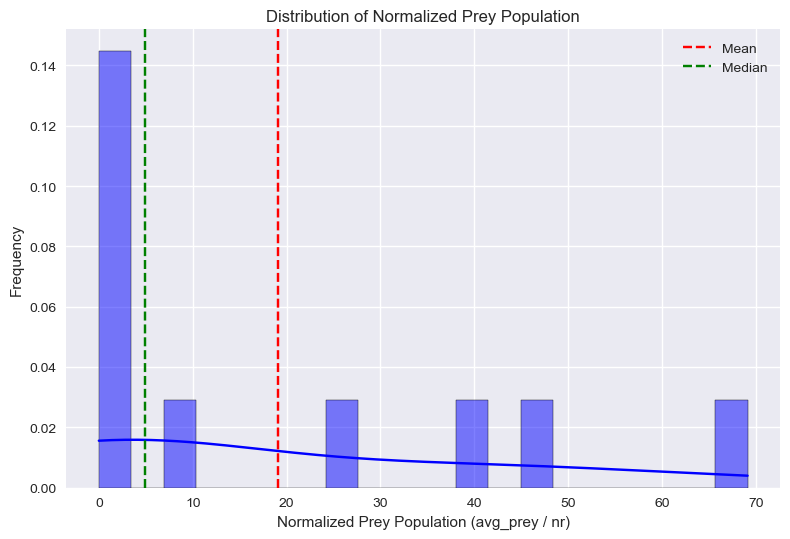

In [17]:
sns.histplot(df['normalized_prey'], kde=True, bins=20, color='blue', stat='density')
plt.axvline(df['normalized_prey'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['normalized_prey'].median(), color='green', linestyle='--', label='Median')
# plt.hist(df['normalized_prey'].to_numpy(), bins='auto', color='blue')

plt.xlabel('Normalized Prey Population (avg_prey / nr)')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Prey Population')
plt.legend()
plt.tight_layout()
plt.savefig("./results/normalized_prey_distribution.png", dpi=300)
plt.show()


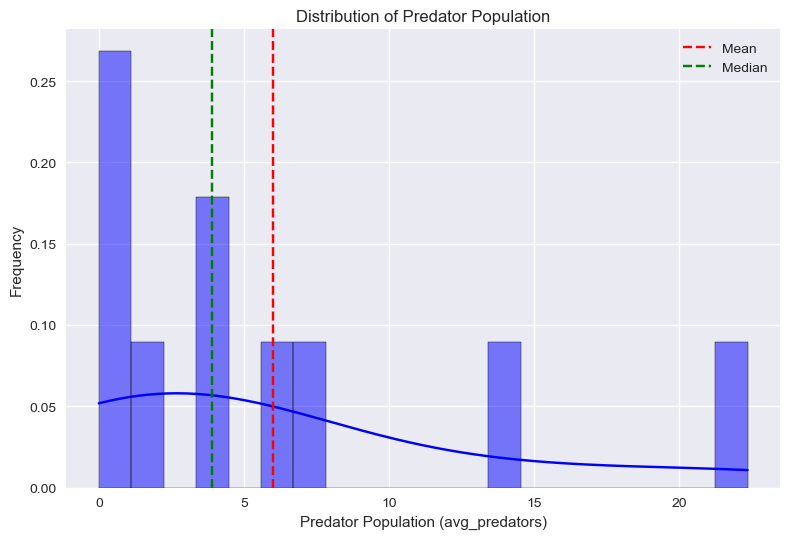

In [19]:
sns.histplot(df['avg_predators'], kde=True, bins=20, color='blue', stat='density')
plt.axvline(df['avg_predators'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['avg_predators'].median(), color='green', linestyle='--', label='Median')

plt.xlabel('Predator Population (avg_predators)')    
plt.ylabel('Frequency')
plt.title('Distribution of Predator Population')
plt.legend()
plt.tight_layout()
plt.savefig("./results/average_predator_distribution.png", dpi=300)
plt.show()

## Heatmaps
We plot heatmaps of each parameter against population averages. 

### Normalized Prey Population vs NR, DF, DR, RF

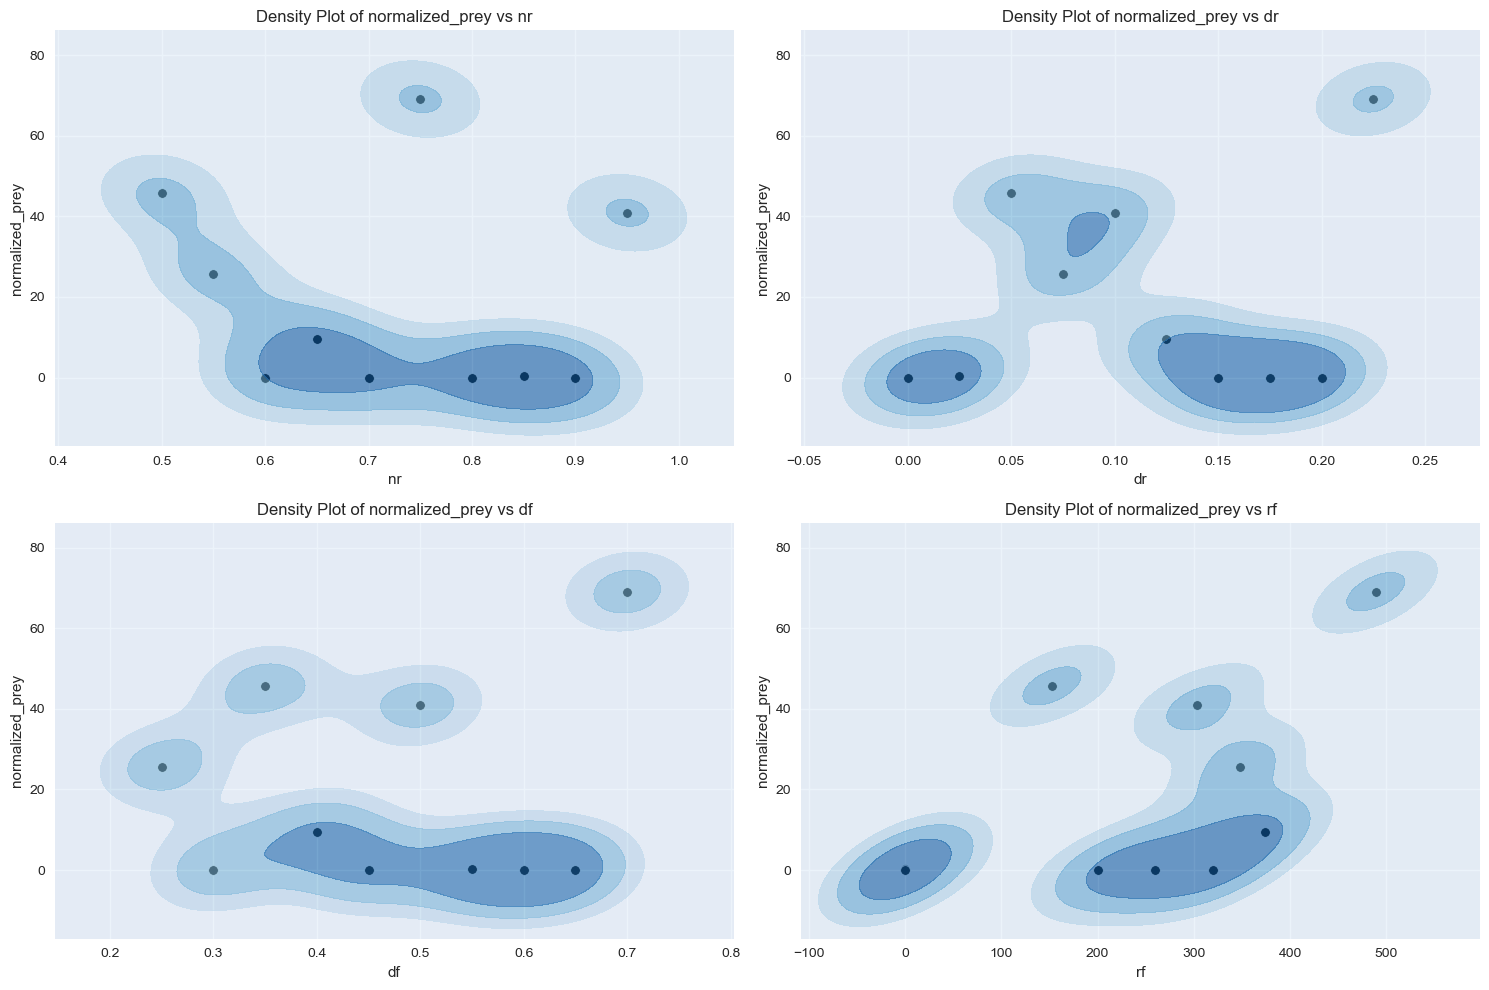

In [26]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
params = ['nr', 'dr', 'df', 'rf']
# Create a scatter plot with a density plot overlay

for i,param in enumerate(params):
    ax  = plt.subplot(2, 2, i+1)
    sns.scatterplot(
        data=df,
        x=param,
        y="normalized_prey",
        color="k",
    )
    sns.kdeplot(
        data=df,
        x=param,
        y="normalized_prey",
        levels=5,
        fill=True,
        alpha=0.6,
        cut=2,
        cmap="Blues",
        thresh=0,
        bw_adjust=0.5,
        ax=ax)
    ax.set_xlabel(param)
    ax.set_ylabel('normalized_prey')
    ax.set_title(f'Density Plot of normalized_prey vs {param}')
plt.tight_layout()
plt.savefig("./results/normalized_prey_vs_params.png", dpi=300)
plt.show()

### Predator Population vs NR, DF, DR, RF

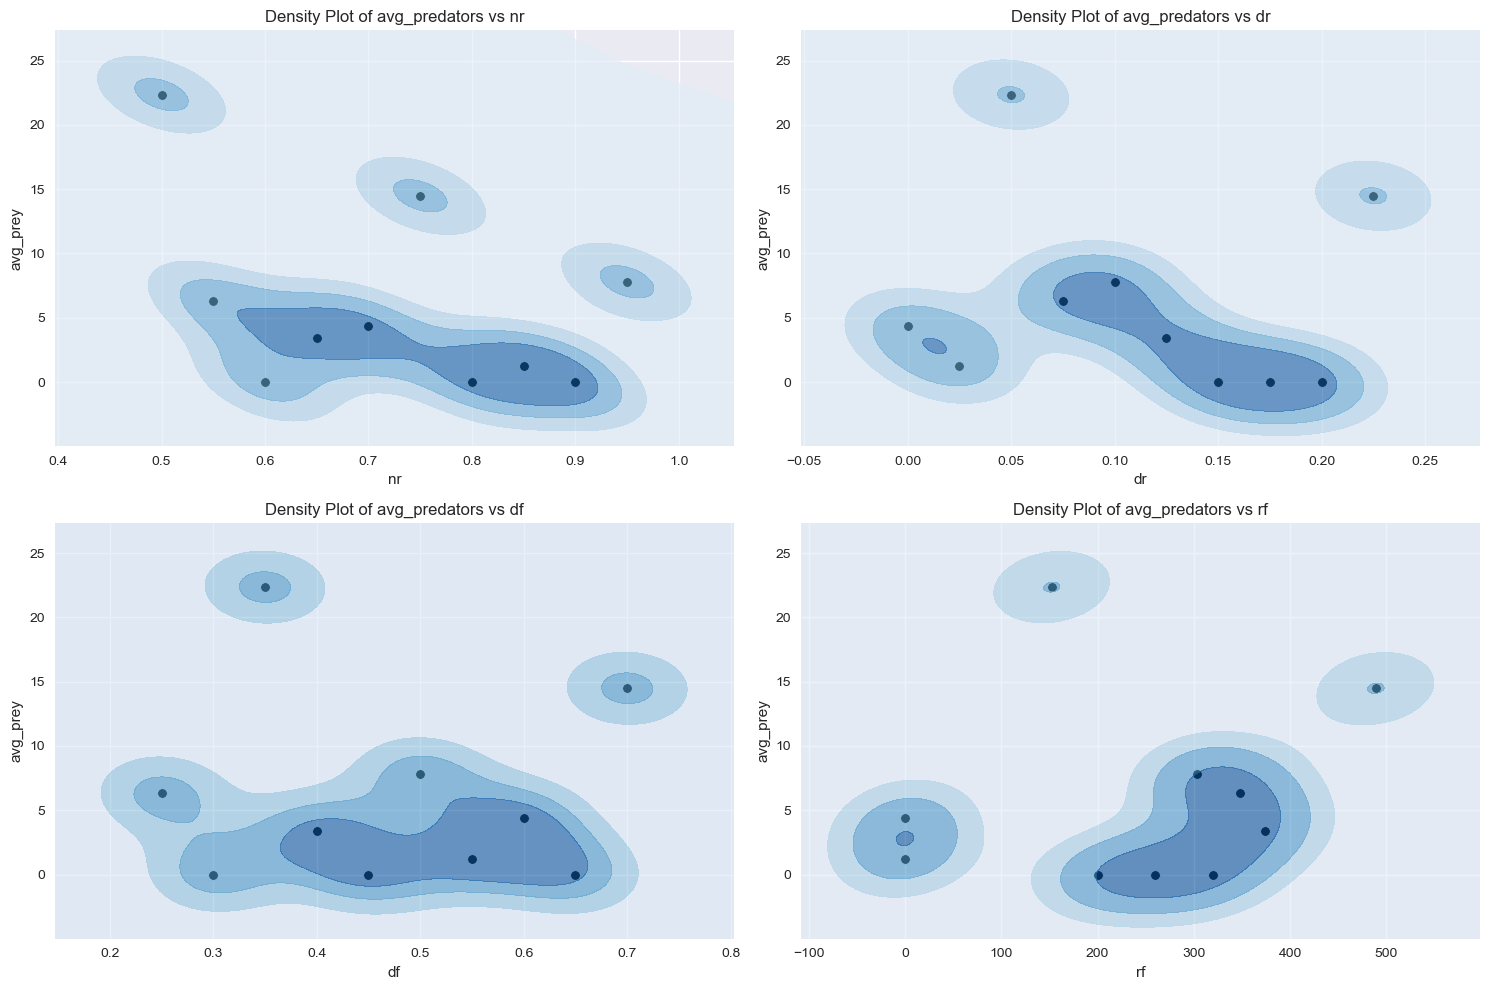

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
params = ['nr', 'dr', 'df', 'rf']

for i,param in enumerate(params):
    ax  = plt.subplot(2, 2, i+1)
    sns.scatterplot(
        data=df,
        x=param,
        y="avg_predators",
        color="k",
    )
    sns.kdeplot(
        data=df,
        x=param,
        y="avg_predators",
        levels=5,
        fill=True,
        alpha=0.6,
        cut=2,
        cmap="Blues",
        thresh=0,
        bw_adjust=0.5,
        ax=ax)
    ax.set_xlabel(param)
    ax.set_ylabel('avg_predators')
    ax.set_title(f'Density Plot of avg_predators vs {param}')
plt.tight_layout()
plt.savefig("./results/avg_predators_vs_params.png", dpi=300)
plt.show()